# **COVID-19 impact on students' Mental Health:Explainable AI and Classifiers**


**Import Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb 
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
ls

'COVID-19 Survey Student Responses.csv'   sample_data/


## dataset connection

In [ ]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")
print (df.shape)
df.head()

(1182, 19)


ID  ... What you miss the most
0  R1  ...         School/college
1  R2  ...  Roaming around freely
2  R3  ...             Travelling
3  R4  ...    Friends , relatives
4  R5  ...             Travelling

[5 rows x 19 columns]

## **Pre-Processing**

In [ ]:
df['Time spent on TV'].replace('No tv', 0, inplace=True)
df['Time spent on TV'].replace('n', 0, inplace=True)
df['Time spent on TV'].replace('N', 0, inplace=True)
df['Time spent on TV'].replace(' ', 0, inplace=True)
df['Time spent on TV'] = df['Time spent on TV'].astype('float')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('None ', 'None')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('Whatsapp', 'WhatsApp')
df.rename(columns = {"Health issue during lockdown":"Mental Health"}, inplace = True)
df.rename(columns = {"Do you find yourself more connected with your family, close friends , relatives  ?":"Connections"}, inplace = True)
df.rename(columns = {"Time spent on Online Class":"Online Cls"}, inplace = True)
df.rename(columns = {"Time spent on self study":"Self Study"}, inplace = True)
df.rename(columns = {"Time spent on fitness":"Fitness"}, inplace = True)
df.rename(columns = {"Time spent on sleep":"Sleep"}, inplace = True)
df.rename(columns = {"Age of Subject":"Age"}, inplace = True)
df.rename(columns = {"Time spent on social media":"Social Media"}, inplace = True)
df.rename(columns = {"Number of meals per day":"Meal"}, inplace = True)
df.rename(columns = {"Change in your weight":"Weight"}, inplace = True)
df.rename(columns = {"Region of residence":"Residence"}, inplace = True)
df.rename(columns = {"Rating of Online Class experience":"Rating Online Cls Exp"}, inplace = True)
df.rename(columns = {"Medium for online class":"Medium"}, inplace = True)
df.rename(columns = {"What you miss the most":"Miss"}, inplace = True)





In [ ]:
df.columns

Index(['ID', 'Residence', 'Age', 'Online Cls', 'Rating Online Cls Exp',
       'Medium', 'Self Study', 'Fitness', 'Sleep', 'Social Media',
       'Prefered social media platform', 'Time spent on TV', 'Meal', 'Weight',
       'Mental Health', 'Stress busters', 'Time utilized', 'Connections',
       'Miss'],
      dtype='object')

###** Mental Health Impact Data visualzation**

### **How many of the students got Mental healt issue during the time?**

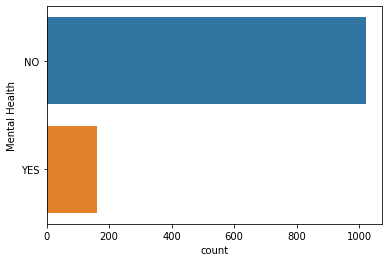

In [ ]:
sns.countplot(y="Mental Health",data=df)

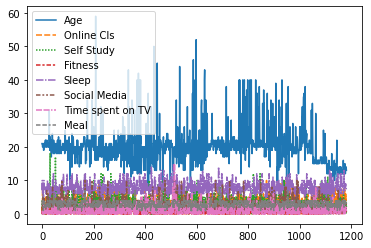

In [ ]:
sns.lineplot(data=df)

# **Classification Model for Mental Health**

### **Show Data**

In [ ]:
df.head()

ID  Residence  Age  ...  Time utilized Connections                   Miss
0  R1  Delhi-NCR   21  ...            YES         YES         School/college
1  R2  Delhi-NCR   21  ...            YES          NO  Roaming around freely
2  R3  Delhi-NCR   20  ...             NO         YES             Travelling
3  R4  Delhi-NCR   20  ...             NO          NO    Friends , relatives
4  R5  Delhi-NCR   21  ...             NO          NO             Travelling

[5 rows x 19 columns]

### **Check Null data**

In [ ]:
df.isnull().sum()

ID                                 0
Residence                          0
Age                                0
Online Cls                         0
Rating Online Cls Exp             24
Medium                            51
Self Study                         0
Fitness                            0
Sleep                              0
Social Media                       0
Prefered social media platform     0
Time spent on TV                   0
Meal                               0
Weight                             0
Mental Health                      0
Stress busters                     0
Time utilized                      0
Connections                        0
Miss                               0
dtype: int64

### **Remove Null data**

In [ ]:
df=df.dropna()  #dropnullvalue

In [ ]:
df.isnull().sum()  #checkmissingvalue in dataset

ID                                0
Residence                         0
Age                               0
Online Cls                        0
Rating Online Cls Exp             0
Medium                            0
Self Study                        0
Fitness                           0
Sleep                             0
Social Media                      0
Prefered social media platform    0
Time spent on TV                  0
Meal                              0
Weight                            0
Mental Health                     0
Stress busters                    0
Time utilized                     0
Connections                       0
Miss                              0
dtype: int64

### **Seeing the categorical data**

In [ ]:
print(df['Residence'].unique())
print(df['Rating Online Cls Exp'].unique())
print(df['Medium'].unique())
print(df['Prefered social media platform'].unique())
print(df['Weight'].unique())
print(df['Mental Health'].unique())
print(df['Time utilized'].unique())
print(df['Connections'].unique())

['Delhi-NCR' 'Outside Delhi-NCR']
['Good' 'Excellent' 'Very poor' 'Average' 'Poor']
['Laptop/Desktop' 'Smartphone' 'Tablet' 'Any Gadget'
 'Smartphone or Laptop/Desktop']
['Linkedin' 'Youtube' 'Instagram' 'WhatsApp' 'None' 'Reddit' 'Snapchat'
 'Twitter' 'Telegram' 'Facebook' 'Elyment' 'Quora' 'Talklife']
['Increased' 'Decreased' 'Remain Constant']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']


### **Taking the data used to build the model**

In [ ]:
model_data=df[['Residence','Age','Online Cls','Rating Online Cls Exp','Medium','Self Study','Fitness','Social Media','Prefered social media platform','Time spent on TV','Meal','Weight','Time utilized','Connections','Mental Health']]

In [ ]:
model_data.head()

Residence  Age  Online Cls  ... Time utilized Connections  Mental Health
0  Delhi-NCR   21         2.0  ...           YES         YES             NO
1  Delhi-NCR   21         0.0  ...           YES          NO             NO
2  Delhi-NCR   20         7.0  ...            NO         YES             NO
3  Delhi-NCR   20         3.0  ...            NO          NO             NO
4  Delhi-NCR   21         3.0  ...            NO          NO             NO

[5 rows x 15 columns]

In [ ]:
type(model_data)

pandas.core.frame.DataFrame

### **Encoding Categorical Data**

In [ ]:
data_encoded=pd.get_dummies(data=model_data,drop_first=True)
data_encoded.head()

Age  Online Cls  ...  Connections_YES  Mental Health_YES
0   21         2.0  ...                1                  0
1   21         0.0  ...                0                  0
2   20         7.0  ...                1                  0
3   20         3.0  ...                0                  0
4   21         3.0  ...                0                  0

[5 rows x 33 columns]

In [ ]:
data_encoded.columns

Index(['Age', 'Online Cls', 'Self Study', 'Fitness', 'Social Media',
       'Time spent on TV', 'Meal', 'Residence_Outside Delhi-NCR',
       'Rating Online Cls Exp_Excellent', 'Rating Online Cls Exp_Good',
       'Rating Online Cls Exp_Poor', 'Rating Online Cls Exp_Very poor',
       'Medium_Laptop/Desktop', 'Medium_Smartphone',
       'Medium_Smartphone or Laptop/Desktop', 'Medium_Tablet',
       'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Weight_Increas

In [ ]:
X = data_encoded.iloc[:, [0,1,2, 3,4,5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]].values
print(X[:5,:]) # Printing First 5 Rows


[[21.  2.  4.  0.  3.  1.  4.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.]
 [21.  0.  0.  2.  3.  0.  3.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.]
 [20.  7.  3.  0.  2.  0.  3.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [20.  3.  2.  1.  5.  0.  3.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [21.  3.  3.  1.  3.  1.  4.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


In [ ]:
data_encoded

Age  Online Cls  ...  Connections_YES  Mental Health_YES
0      21         2.0  ...                1                  0
1      21         0.0  ...                0                  0
2      20         7.0  ...                1                  0
3      20         3.0  ...                0                  0
4      21         3.0  ...                0                  0
...   ...         ...  ...              ...                ...
1177   12         3.0  ...                1                  0
1178   14         6.0  ...                1                  0
1179   13         4.0  ...                1                  0
1180   14         5.0  ...                1                  0
1181   13         5.0  ...                1                  0

[1131 rows x 33 columns]

In [ ]:
data_encoded.columns

Index(['Age', 'Online Cls', 'Self Study', 'Fitness', 'Social Media',
       'Time spent on TV', 'Meal', 'Residence_Outside Delhi-NCR',
       'Rating Online Cls Exp_Excellent', 'Rating Online Cls Exp_Good',
       'Rating Online Cls Exp_Poor', 'Rating Online Cls Exp_Very poor',
       'Medium_Laptop/Desktop', 'Medium_Smartphone',
       'Medium_Smartphone or Laptop/Desktop', 'Medium_Tablet',
       'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Weight_Increas

In [ ]:
type(data_encoded)

pandas.core.frame.DataFrame

### **Splitting the Data into independent and dependent variables**

In [ ]:
 X=data_encoded[['Age', 'Online Cls', 'Self Study', 'Fitness', 'Social Media',
       'Time spent on TV', 'Meal', 'Residence_Outside Delhi-NCR',
       'Rating Online Cls Exp_Excellent', 'Rating Online Cls Exp_Good',
       'Rating Online Cls Exp_Poor', 'Rating Online Cls Exp_Very poor',
       'Medium_Laptop/Desktop', 'Medium_Smartphone',
       'Medium_Smartphone or Laptop/Desktop', 'Medium_Tablet',
       'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Weight_Increased',
       'Weight_Remain Constant', 'Time utilized_YES', 'Connections_YES']]
 y=data_encoded['Mental Health_YES']
print(X.head())
print(y.head())

#X=data_encoded.drop('Mental Health issue during lockdown_YES',axis=1)
#y=data_encoded['Mental Health issue during lockdown_YES']

   Age  Online Cls  ...  Time utilized_YES  Connections_YES
0   21         2.0  ...                  1                1
1   21         0.0  ...                  1                0
2   20         7.0  ...                  0                1
3   20         3.0  ...                  0                0
4   21         3.0  ...                  0                0

[5 rows x 32 columns]
0    0
1    0
2    0
3    0
4    0
Name: Mental Health_YES, dtype: uint8


In [ ]:
y.shape

(1131,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_new = X.copy()

### **Applying Standard Scaler to independent variables**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]

array([[ 1.59103135e-01, -6.24855842e-01,  5.07113628e-01,
        -1.05552053e+00,  3.68089063e-01, -1.75142051e-03,
         1.30047942e+00, -8.02430900e-01, -3.04554795e-01,
         2.01785750e+00, -1.65069550e-01, -7.46894397e-01,
         1.03693267e+00, -9.54187074e-01, -6.66370568e-02,
        -1.83904434e-01, -2.15066197e-01, -6.48732820e-01,
         4.34074939e+00, -1.23532681e-01, -2.97482059e-02,
        -6.66370568e-02, -8.44024621e-02, -2.97482059e-02,
        -5.15710623e-02, -1.50346195e-01, -6.30890046e-01,
        -6.09023063e-01,  1.29618470e+00, -9.03000172e-01,
         1.02961609e+00,  6.50108844e-01],
       [ 1.59103135e-01, -1.58699050e+00, -1.37028576e+00,
         1.71526680e+00,  3.68089063e-01, -7.94094059e-01,
         8.99096884e-02, -8.02430900e-01,  3.28348138e+00,
        -4.95575134e-01, -1.65069550e-01, -7.46894397e-01,
        -9.64382771e-01,  1.04801252e+00, -6.66370568e-02,
        -1.83904434e-01, -2.15066197e-01, -6.48732820e-01,
        -2.30

In [ ]:
X = pd.DataFrame(X, columns=X_new.columns, 
                           index=X_new.index)

In [ ]:
type(X)

pandas.core.frame.DataFrame

### **Splitting data into train and test data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

###*ML AND AI MODEL TRAIN*

### **Applying Logistic Regression and Accuracy**  

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

[[295   0]
 [ 43   2]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       295
           1       1.00      0.04      0.09        45

    accuracy                           0.87       340
   macro avg       0.94      0.52      0.51       340
weighted avg       0.89      0.87      0.82       340



In [ ]:
lr.score(X_test, y_test)*100

87.3529411764706

### **Applying Random Forest and Accuracy**  

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

[[294   1]
 [ 44   1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       295
           1       0.50      0.02      0.04        45

    accuracy                           0.87       340
   macro avg       0.68      0.51      0.49       340
weighted avg       0.82      0.87      0.81       340



In [ ]:
clf.score(X_test, y_test)*100

86.76470588235294

###*XGBoost*

**XGBOOST CLASSIFIER** 87.94117647058823

In [ ]:

# Import libraries

#import xgboost as xgb 
#from sklearn.model_selection import train_test_split


# Instatiate a XGBClassifier 
xgb = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb.get_params()


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
## Set max_depth to be 10 instead of 100
xgb.set_params(n_estimators=100)

# Fit it to the training set
xgb.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb.predict(X_test)
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))

[[292   3]
 [ 41   4]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       295
           1       0.57      0.09      0.15        45

    accuracy                           0.87       340
   macro avg       0.72      0.54      0.54       340
weighted avg       0.84      0.87      0.83       340



In [ ]:
xgb.score(X_test, y_test)*100

87.05882352941177

###*Adaboost*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 123)
adaboost.fit(X_train,y_train)
Y_pred = adaboost.predict(X_test)
# load required classifer
#from sklearn.ensemble import AdaBoostClassifier
# import Support Vector Classifier
#from sklearn.svm import SVC
# import scikit-learn metrics module for accuracy calculation
#from sklearn.metrics import accuracy_score
#svc=SVC(probability=True, kernel='linear')
# create adaboost classifer object
#adab =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)
# train adaboost classifer
#adab = adab.fit(X_train, y_train)

In [ ]:
# predict the response for test dataset
#y_pred = adab.predict(X_test)
print(confusion_matrix(y_test,adaboost.predict(X_test)))
print(classification_report(y_test, adaboost.predict(X_test)))

# calculate and print model accuracy
#print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

[[285   9]
 [ 40   6]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       294
           1       0.40      0.13      0.20        46

    accuracy                           0.86       340
   macro avg       0.64      0.55      0.56       340
weighted avg       0.81      0.86      0.82       340



In [ ]:
adaboost.score(X_test, y_test)*100

84.70588235294117

### **Building ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 40, epochs = 100,verbose = 1)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.8357
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.8470
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.8470
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.8470
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.8470
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8470
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8470
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8470
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8470
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3752 - accuracy: 0.8470
Epoch 11/

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[280  22]
 [ 34   4]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       302
           1       0.15      0.11      0.12        38

    accuracy                           0.84       340
   macro avg       0.52      0.52      0.52       340
weighted avg       0.81      0.84      0.82       340



### **Tuning the ANN using Grid Search**

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}
Best Accuracy after tuning: 0.8457911392405064


In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100,verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6833 - accuracy: 0.8357
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.8546
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.8546
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.8546
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8546
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8546
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8546
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8546
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8546
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8546
Epoch 11/

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[287   9]
 [ 39   5]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       296
           1       0.36      0.11      0.17        44

    accuracy                           0.86       340
   macro avg       0.62      0.54      0.55       340
weighted avg       0.81      0.86      0.83       340



**LIME**

In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 6.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c6eca025f726a060128b184896110b3b15de0f8ce31b88b3f762d0d697025aad
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# LIME has one explainer for all the models
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="lasso_path",
    class_names=["Mental Health Bad", "Mental Health Good"],
    discretize_continuous=True,
    discretizer="entropy",
)

#org code
# explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names=X_train,
#                                                   class_names=[mental health impact'bad', mental health not impact'good'], mode='classification')

In [ ]:
#row = 100

exp = lime_explainer.explain_instance(X_test.iloc[150], clf.predict_proba, num_features=10)
 
exp.show_in_notebook(show_table=True)

#org code
# exp = explainer.explain_instance(
#     data_row=X_test.iloc[1], 
#     predict_fn=model.predict_proba
# )

# exp.show_in_notebook(show_table=True)

In [ ]:
exp = lime_explainer.explain_instance(X_test.iloc[142], clf.predict_proba, num_features=10)
 
exp.show_in_notebook(show_table=True)


In [ ]:
X_test.shape

(340, 32)

In [ ]:
#row = 100

exp = lime_explainer.explain_instance(X_test.iloc[250], lr.predict_proba, num_features=10)
 
exp.show_in_notebook(show_table=True)

**SHAP MODEL**

**SHAP MODEL**


In [ ]:
pip install shap

     |████████████████████████████████| 356 kB 4.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491648 sha256=92b4adb82100014d3172acce8190d9672f455735616f7553422a2a1fa949e1e5
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap 

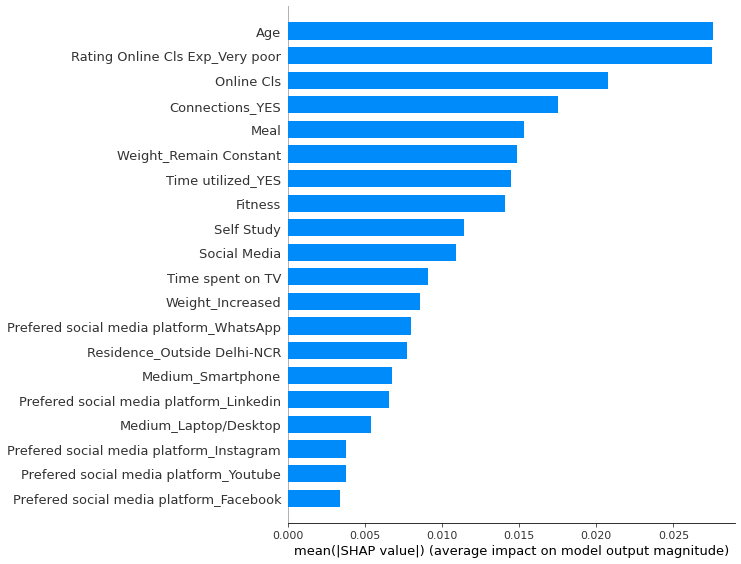

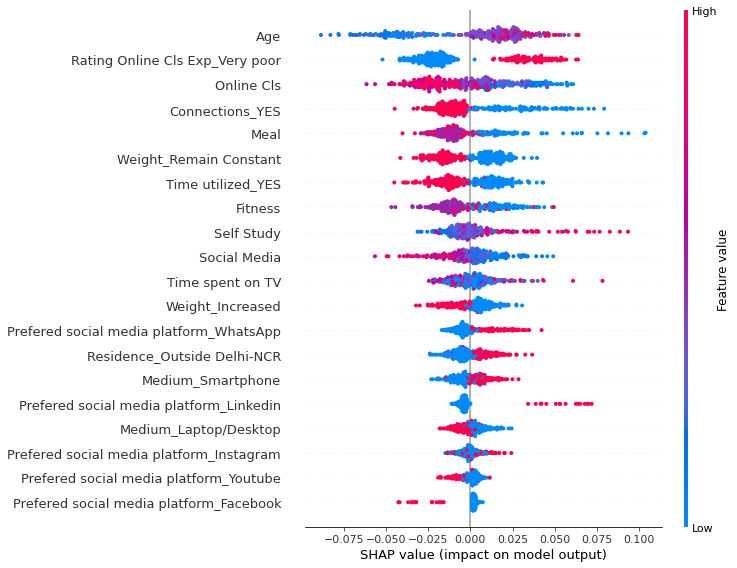

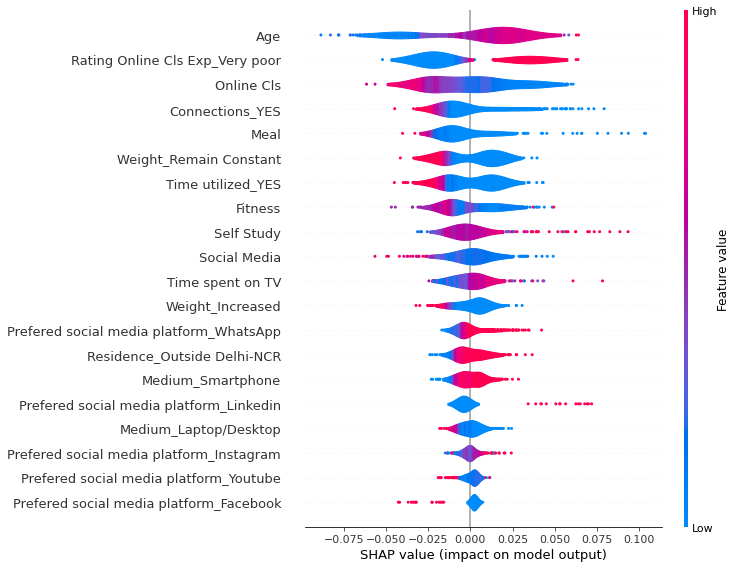

In [ ]:
# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
#Summary Plot as a bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')
#Summary Plot as a dot chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='dot')
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='violin')

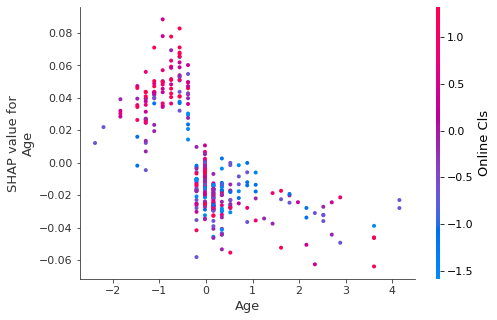

In [ ]:
shap.initjs()
# compute SHAP values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
                                    # The first argument is the index of the feature we want to plot
# The second argument is the matrix of SHAP values (it is the same shape as the data matrix)
# The third argument is the data matrix (a pandas dataframe or numpy array)
shap.dependence_plot(0, shap_values[0], X_test)

In [ ]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
X.iloc[[250]]

Age  Online Cls  ...  Time utilized_YES  Connections_YES
258 -0.931477    0.818346  ...          -0.971236         0.650109

[1 rows x 32 columns]

In [ ]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
X_test.iloc[[310]]

Age  Online Cls  ...  Time utilized_YES  Connections_YES
987 -0.386187    0.818346  ...          -0.971236         0.650109

[1 rows x 32 columns]

In [ ]:
choosen_instance = X_test.iloc[[310]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
choosen_instance = X_test.iloc[[4]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
choosen_instance = X_test.iloc[[1]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
shap_values

[array([[-4.32231768e-02, -6.24207139e-03,  1.31151041e-02,
         -5.03087014e-04, -1.93662603e-02, -1.18690047e-02,
          2.44781700e-03,  7.59962304e-03, -1.55972607e-03,
         -9.97412435e-04,  2.47829942e-03,  1.17799983e-02,
          4.10404007e-03,  3.86393103e-04,  6.39316582e-04,
         -1.18412003e-03, -1.22502933e-03,  3.13951200e-03,
          2.12409706e-03, -2.59507749e-04,  9.82585494e-04,
          1.43741535e-04, -8.37088751e-05, -4.40362011e-06,
          1.04692904e-03,  4.76650456e-04, -3.23314254e-03,
         -7.90146894e-03, -7.68489523e-04,  1.92630458e-02,
          2.55329774e-02,  7.69903771e-03]]),
 array([[ 4.32231768e-02,  6.24207139e-03, -1.31151041e-02,
          5.03087014e-04,  1.93662603e-02,  1.18690047e-02,
         -2.44781700e-03, -7.59962304e-03,  1.55972607e-03,
          9.97412435e-04, -2.47829942e-03, -1.17799983e-02,
         -4.10404007e-03, -3.86393103e-04, -6.39316582e-04,
          1.18412003e-03,  1.22502933e-03, -3.13951200